# Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [14]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
x=data.iloc[:,2:4].values
y=data.iloc[:,4].values

# Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()

In [42]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Build Model

In [67]:
from sklearn.svm import SVC
svc_model=SVC(kernel="linear")

In [68]:
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [69]:
y_pred_train=svc_model.predict(x_train)
y_pred=svc_model.predict(x_test)

In [70]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [71]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

# Evaluate Model Peformance

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.8625, 0.828125)

In [73]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 9, 19]], dtype=int64)

In [74]:
confusion_matrix(y_train,y_pred_train)

array([[192,  13],
       [ 42,  73]], dtype=int64)

# Plot Decision Region

In [75]:
from mlxtend.plotting import plot_decision_regions

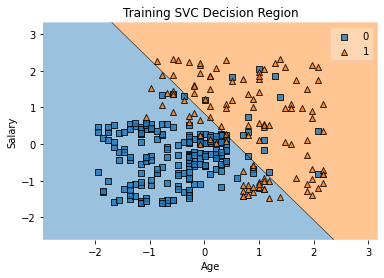

In [80]:
plot_decision_regions(x_train,y_train,clf=svc_model)
plt.title("Training SVC Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

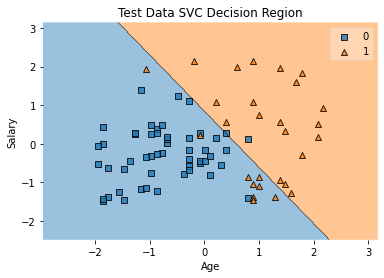

In [81]:
plot_decision_regions(x_test,y_test,clf=svc_model)
plt.title("Test Data SVC Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()